In [16]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import re


def find_first_appear_number(s):
    num = 0
    for i, c in enumerate(s):
        if c.isdigit():
            num = num * 10 + int(c)
        else:
            if num == 0:
                continue
            else:
                break
    return num


def read_loss_file(file_path, mode='train'):
    with open(file_path, 'r') as f:
        lines = f.readlines()
    info = OrderedDict()
    for i, line in enumerate(lines):
        if line.find("val") != -1 and mode == 'train':
            continue
        if line.find("val") == -1 and mode == 'val':
            continue
        line = line.replace(" ", "")
        if line.find("val") == -1:
            epoch_pattern = re.compile(r'(?:train:)\d+\.?\d*')
            # print(epoch_pattern.findall(line))
            epoch = int(epoch_pattern.findall(line)[0][6:])
        else:
            epoch_pattern = re.compile(r'(?:val:)\d+\.?\d*')
            epoch = int(epoch_pattern.findall(line)[0][4:])
        loss_pattern = re.compile(r'(?:Loss/total:)\d+\.?\d*')
        loss = float(loss_pattern.findall(line)[0][11:])
        iou_pattern = re.compile(r'(?:IoU:)\d+\.?\d*')
        iou = float(iou_pattern.findall(line)[0][4:])
        # print(line)
        # print(epoch)
        # print(loss)
        # print(iou)

        if epoch in info.keys():
            info[epoch].append((loss, iou))
        else:
            info[epoch] = [(loss, iou)]
    return info

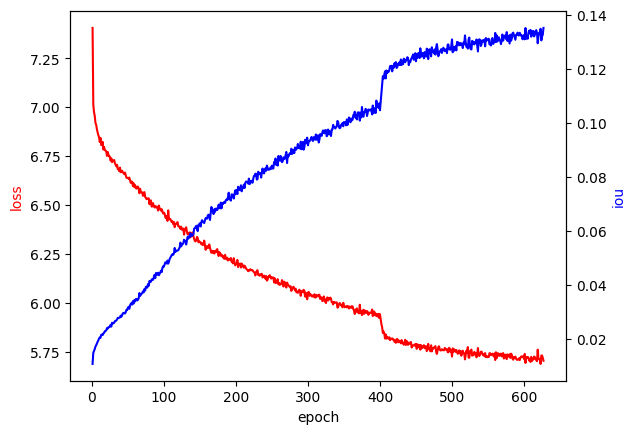

In [17]:
loss_file_path = '/home/lzd/workspace/LeeNet/logs/LeeNet_score_RMT_MLP00001/result.log'

info = read_loss_file(loss_file_path, mode='train')
# 画图
loss_list = []
iou_list = []
for epoch, loss_iou in info.items():
    num = 0
    loss_sum = 0
    iou_sum = 0
    for loss, iou in loss_iou:
        num += 1
        loss_sum += loss
        iou_sum += iou
    loss_list.append(loss_sum / num)
    iou_list.append(iou_sum / num)

# 放大画布
# 分两个画布绘制
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(range(1, len(loss_list) + 1), loss_list, 'r-')
ax2.plot(range(1, len(iou_list) + 1), iou_list, 'b-')
ax1.set_xlabel('epoch')

ax1.set_ylabel('loss', color='r')
ax2.set_ylabel('iou', color='b')
plt.show()
